In [1]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

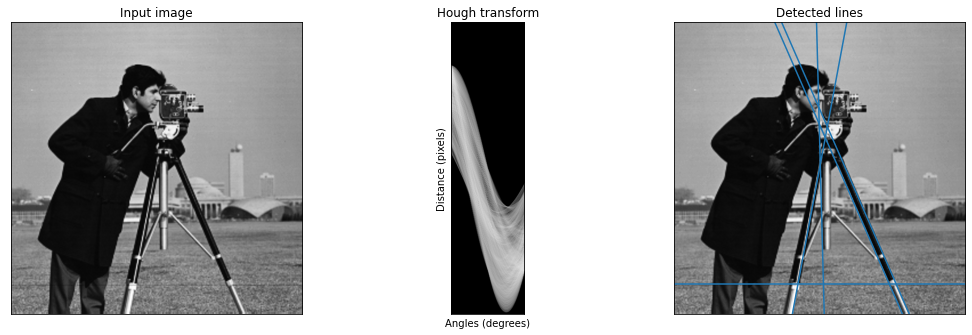

In [4]:
image = data.camera()
edges = canny(image, 2, 1, 25)

hspace, angles, dists = hough_line(edges)
original_hspace = hspace.copy()
hspace, angles, dists = hough_line_peaks(hspace=hspace, angles=angles, dists=dists,num_peaks=5)

angle_step = 0.5 * np.diff(angles).mean()
d_step = 0.5 * np.diff(dists).mean()
bounds = [np.rad2deg(angles[0] - angle_step),
          np.rad2deg(angles[-1] + angle_step),
          dists[-1] + d_step, dists[0] - d_step]

fig, axes = plt.subplots(1,3, figsize=(15,5))
ax = axes.ravel()
axes[0].imshow(image, cmap=cm.gray)
axes[0].set_title('Input image')

axes[1].imshow(np.log(1 + original_hspace), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
axes[1].set_title('Hough transform')
axes[1].set_xlabel('Angles (degrees)')
axes[1].set_ylabel('Distance (pixels)')
axes[1].axis('image')

axes[2].imshow(image, cmap=cm.gray)
axes[2].set_ylim((image.shape[0], 0))
axes[2].set_title('Detected lines')

for _, angle, dist in zip(hspace, angles, dists ):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    axes[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()